In [1]:
import datetime
import matplotlib as mpl
import backtrader as bt
%matplotlib inline

import pandas_datareader as pdr

import requests_cache
session = requests_cache.CachedSession(cache_name='stocks-cache', backend='sqlite')

nvda_df = pdr.DataReader('NVDA', start='1999-01-22', end='2020-05-01', data_source='yahoo', session=session)
nvda_df = nvda_df[nvda_df.index >= '2014-01-01']

fxit_df = pdr.DataReader('FXIT', start='2014-01-01', end='2020-05-01', data_source='moex', session=session)
fxit_df = fxit_df.dropna()
fxit_df = fxit_df[~(fxit_df['CLOSE'] < 100)]

/Users/dmitri/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<IPython.core.display.Javascript object>


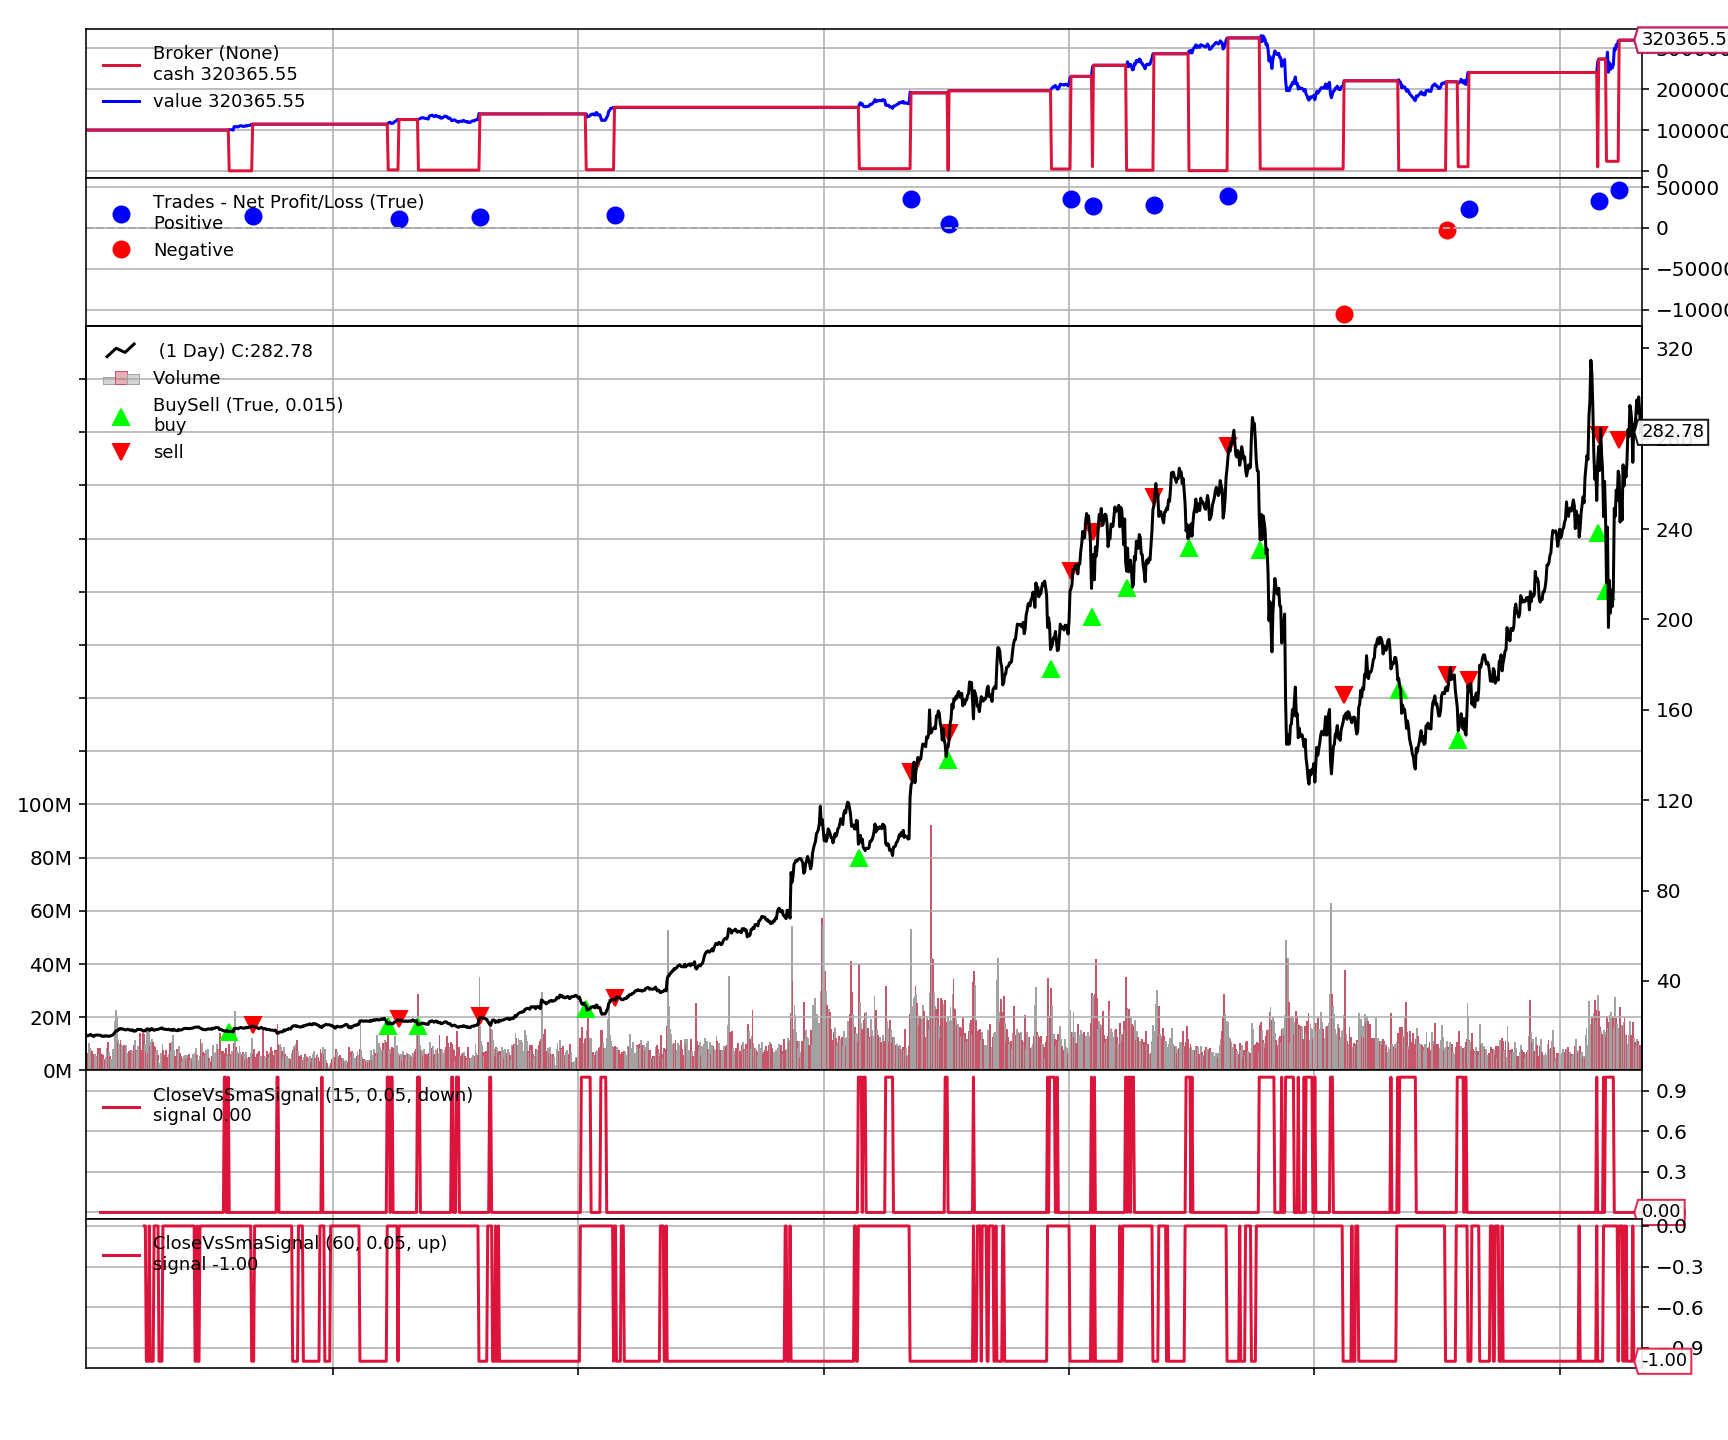

In [6]:
from baselines import simple_buy_sell_strategy

cerebro = simple_buy_sell_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();

<IPython.core.display.Javascript object>


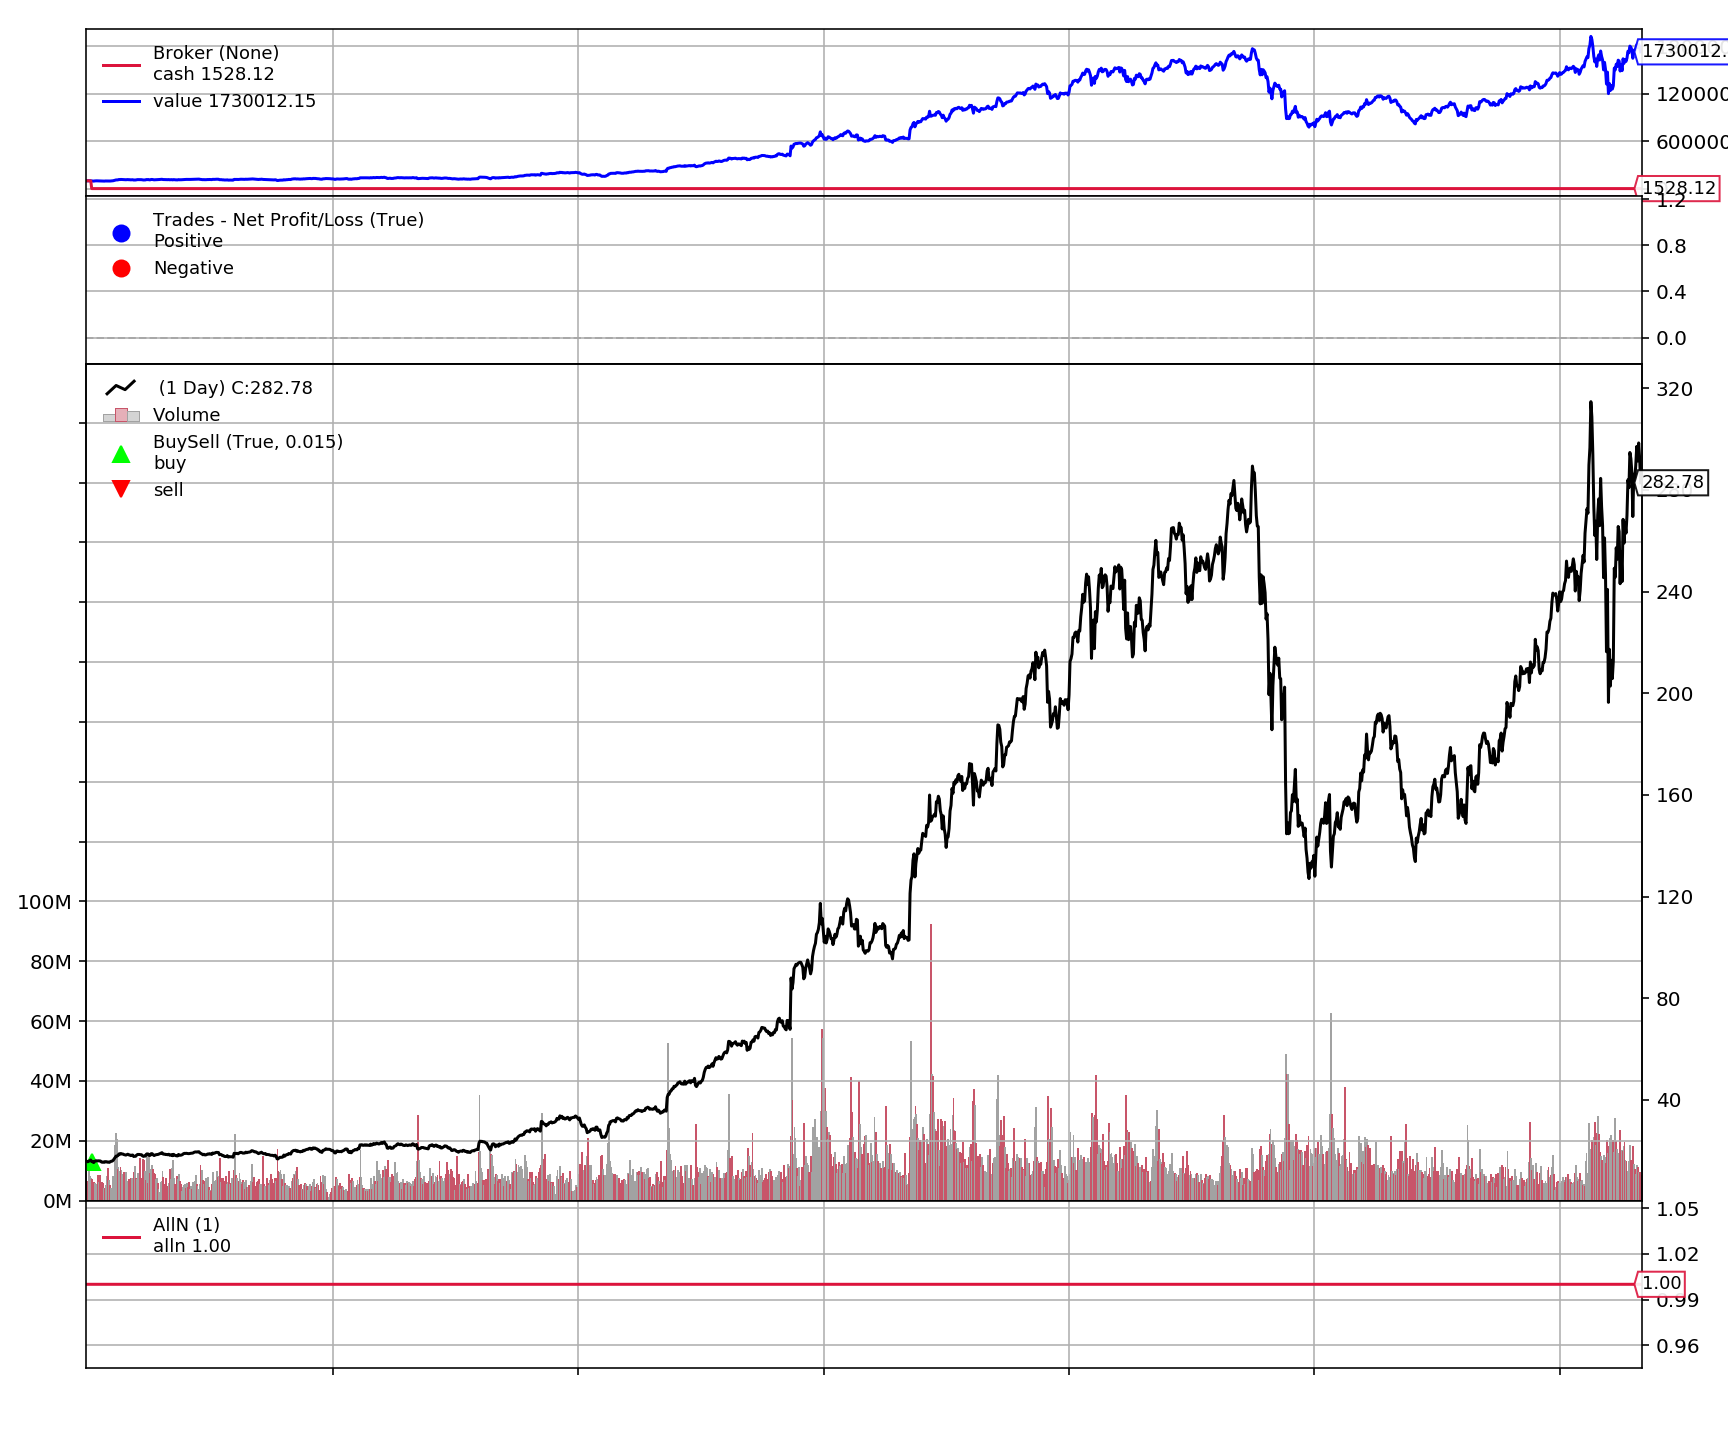

In [35]:
from baselines import random_strategy

cerebro = random_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();

<IPython.core.display.Javascript object>


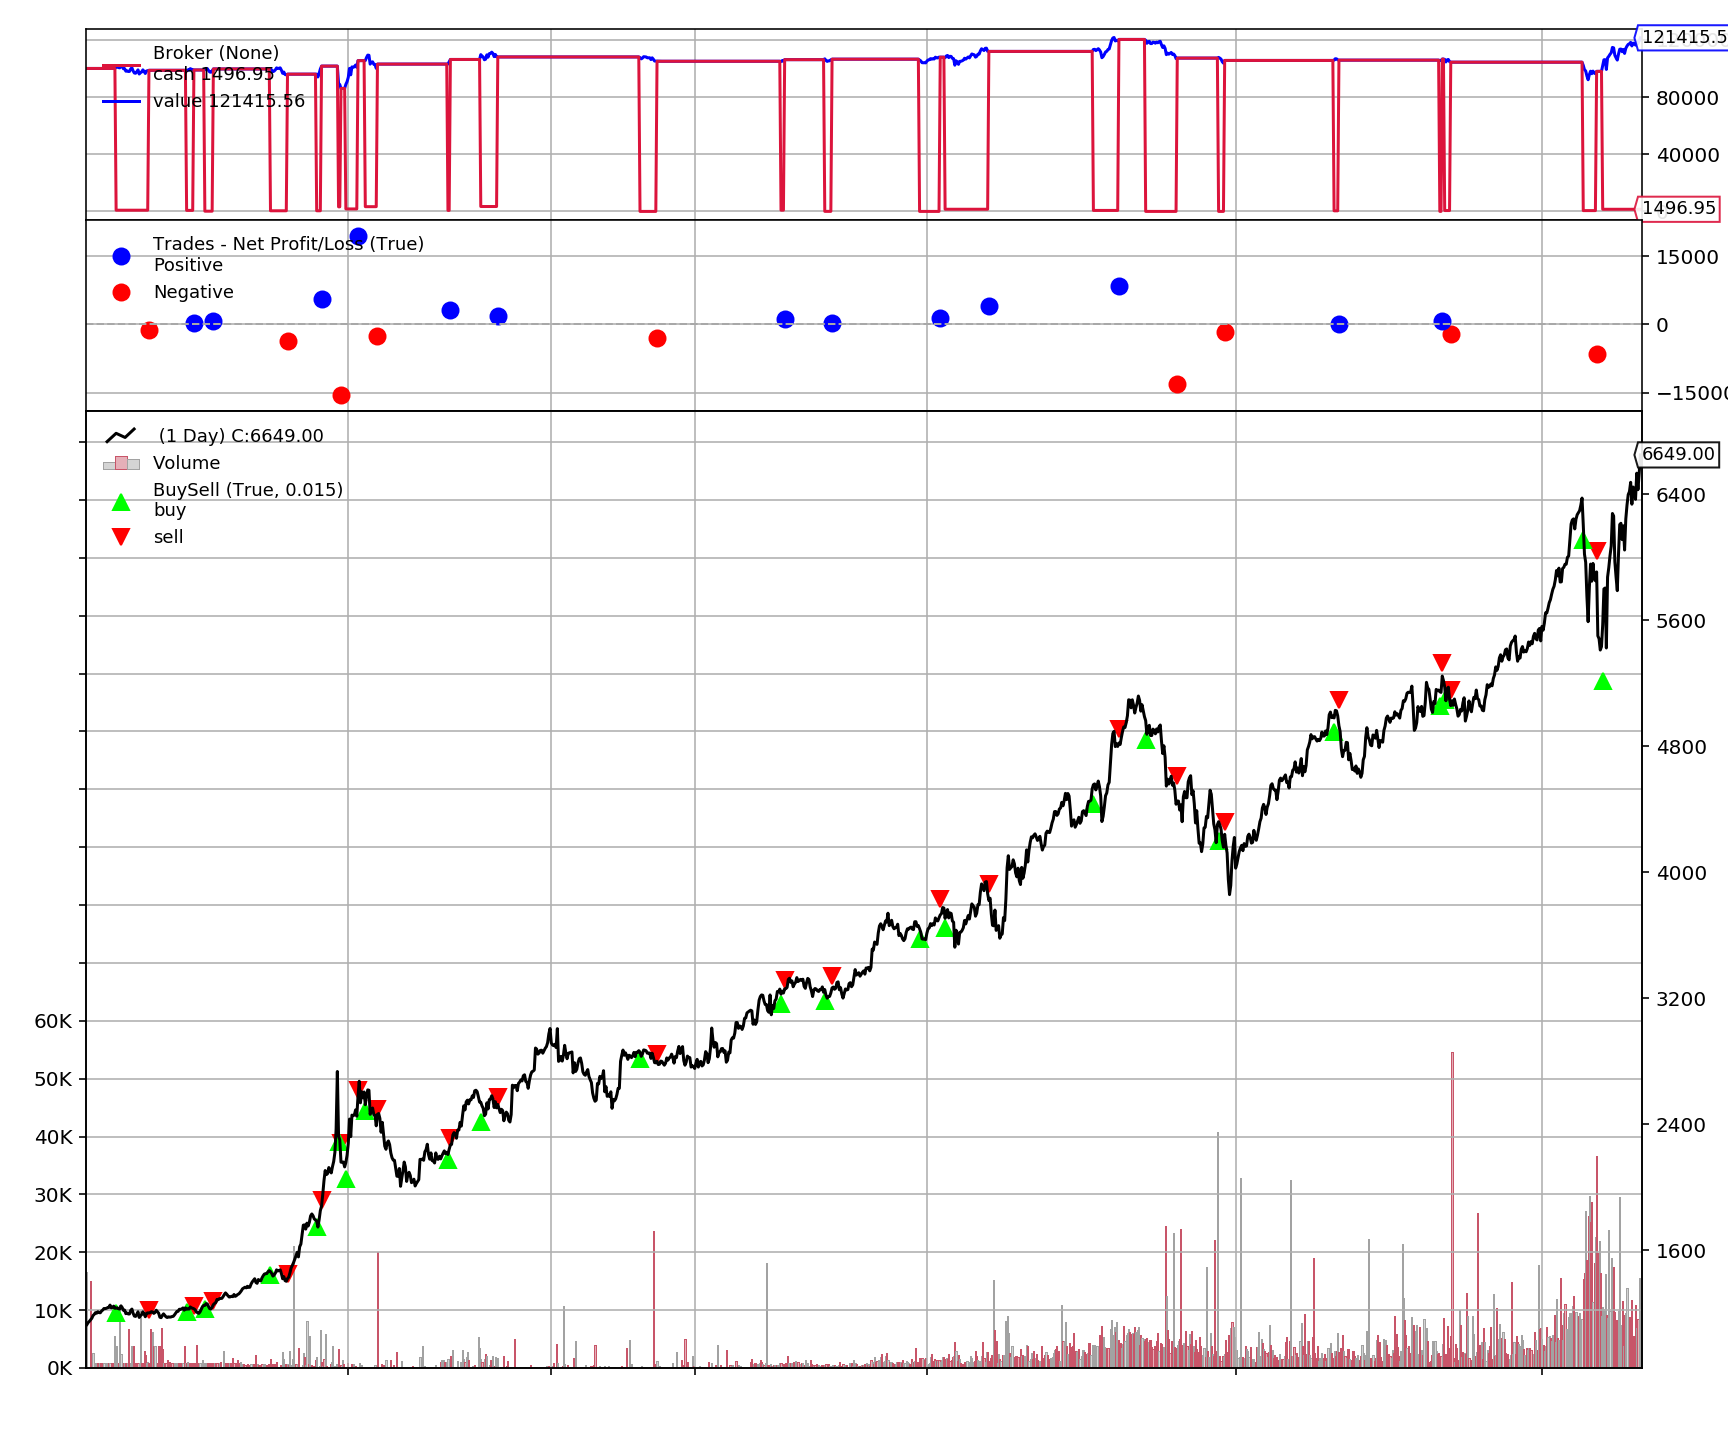

In [34]:
from baselines import random_strategy

cerebro = random_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=fxit_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();

<IPython.core.display.Javascript object>


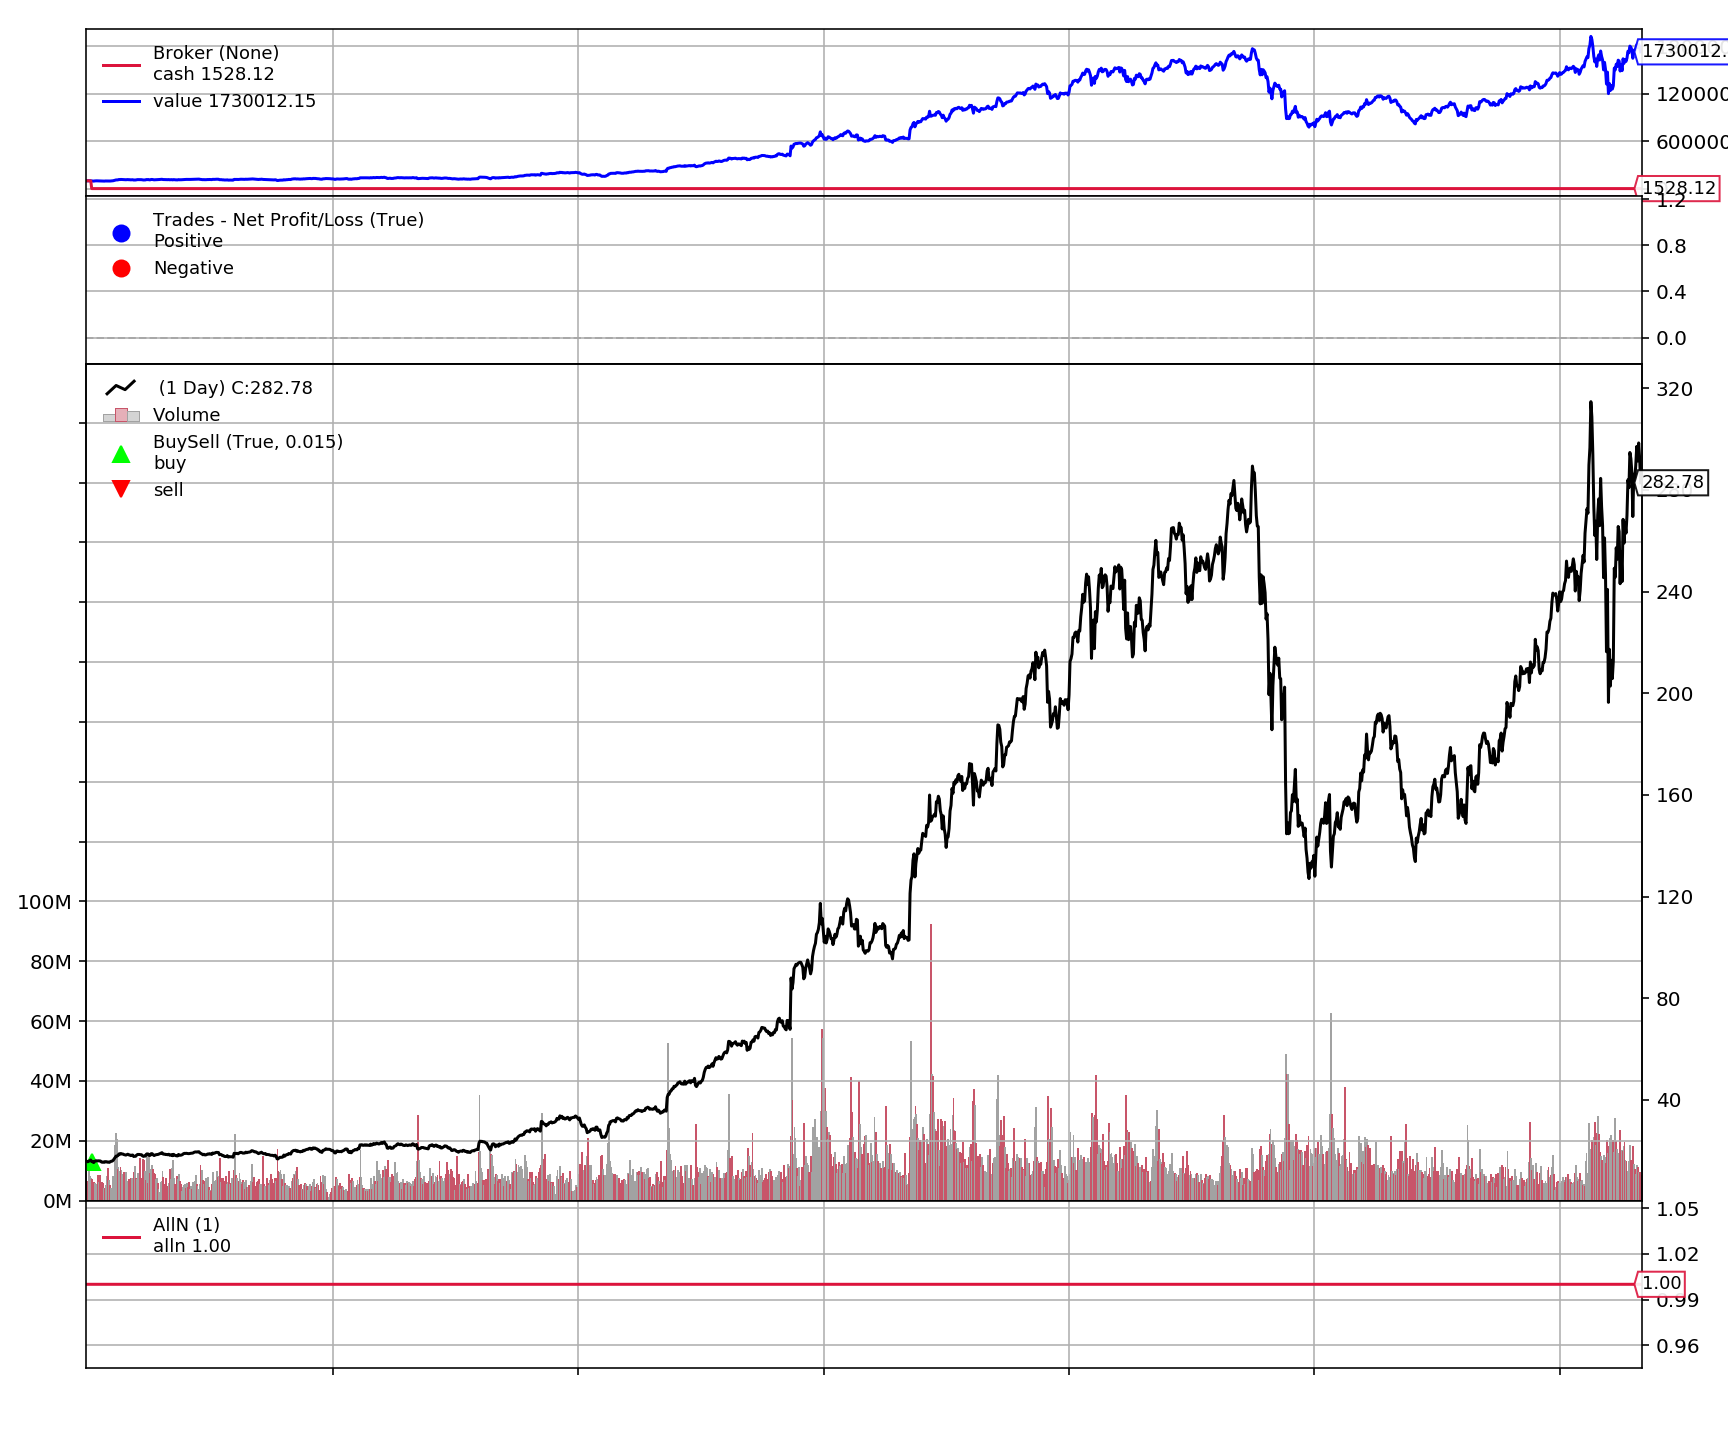

In [2]:
from baselines import buy_and_hold_strategy

cerebro = buy_and_hold_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();